In [1]:
import numpy as np
import pandas as pd

In [60]:
file = pd.read_csv("Pin_Lv_6_8_10kmer_MIC.csv", index_col = 0)
# file = pd.read_csv("/download/lzm/data_for_MIC_20201207/raw_data_for_MIC_117_20201207/_1/finsh.txt", sep=' ', index_col = 0)

In [3]:
# file = file.transform(lambda x: np.where(x.isnull(), 0, 1))

In [67]:
# file.rename(columns = {'5':'MIC'}, inplace = True)

In [41]:
# file = file.set_index('1')

In [55]:
import numpy as np
import pandas as pd

MIC = pd.read_csv("MIC.csv", header = None)
x = MIC[[1,5]]
x.set_index([1], inplace = True)
x.head(3)

,5
1,
SAMN07525418,0.0625
SAMN07525443,0.0625
SAMN07525381,0.0625


In [68]:
file = pd.merge(file, x, left_index=True, right_index=True)

In [77]:
file.drop(columns=[5], inplace=True)

In [78]:
file.head(3)

,AAAAAA,AAAAAC,AAAAAG,AAAAAT,AAAACA,AAAACC,AAAACG,AAAACT,AAAAGA,AAAAGC,...,TTTTACAAAA,TTTTAGAAAA,TTTTATAAAA,TTTTCAAAAA,TTTTCCAAAA,TTTTCGAAAA,TTTTGAAAAA,TTTTGCAAAA,TTTTTAAAAA,MIC
SRR5385429,0.001121,0.000856,0.000896,0.000882,0.000568,0.000846,0.000789,0.000411,0.000502,0.000810,...,0.000002,0.000002,0.000002,0.000006,0.000001,0.000001,0.000006,0.000002,0.000003,1.0
SRR5385434,0.001135,0.000868,0.000899,0.000884,0.000570,0.000851,0.000791,0.000406,0.000503,0.000821,...,0.000003,0.000002,0.000002,0.000004,0.000001,0.000001,0.000005,0.000002,0.000002,8.0
SRR5385437,0.001127,0.000863,0.000891,0.000881,0.000568,0.000847,0.000783,0.000406,0.000499,0.000818,...,0.000002,0.000002,0.000002,0.000005,0.000001,0.000001,0.000005,0.000002,0.000002,8.0


In [79]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

In [80]:
X = file.iloc[:, :-1]

In [81]:
y = file.iloc[:, -1]

In [82]:
len(X.columns)

559494

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 17,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()

In [84]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

In [85]:
ans

array([ 1., 16.,  1., 16.,  1.,  8.,  1.,  1.,  1.,  8.,  1.,  1.,  1.,
        1.,  1., 16.,  1.,  1., 16.,  8.,  1., 16.], dtype=float32)

In [86]:
temp = xgb.DMatrix(X)

In [87]:
ans_tmp = model.predict(temp)
np.save('kmer_predict_result.npy', ans_tmp)

In [88]:
import pickle

In [89]:
pickle.dump(model, open('kmer_model.pickle.dat', "wb"))

In [95]:
tmp_model = pickle.load(open('gene_model.pickle.dat', "rb"))

In [94]:
file['kmer_predict_result'] = tmp_model.predict(temp)

In [97]:
file['snp_predict_result'] = np.load('gene_predict_result.npy')

In [99]:
file.head(3)

,AAAAAA,AAAAAC,AAAAAG,AAAAAT,AAAACA,AAAACC,AAAACG,AAAACT,AAAAGA,AAAAGC,...,TTTTATAAAA,TTTTCAAAAA,TTTTCCAAAA,TTTTCGAAAA,TTTTGAAAAA,TTTTGCAAAA,TTTTTAAAAA,MIC,kmer_predict_result,snp_predict_result
SRR5385429,0.001121,0.000856,0.000896,0.000882,0.000568,0.000846,0.000789,0.000411,0.000502,0.000810,...,0.000002,0.000006,0.000001,0.000001,0.000006,0.000002,0.000003,1.0,1.0,1.0
SRR5385434,0.001135,0.000868,0.000899,0.000884,0.000570,0.000851,0.000791,0.000406,0.000503,0.000821,...,0.000002,0.000004,0.000001,0.000001,0.000005,0.000002,0.000002,8.0,8.0,8.0
SRR5385437,0.001127,0.000863,0.000891,0.000881,0.000568,0.000847,0.000783,0.000406,0.000499,0.000818,...,0.000002,0.000005,0.000001,0.000001,0.000005,0.000002,0.000002,8.0,8.0,8.0


In [107]:
sum_predict_result = file.iloc[:, -3:]

In [110]:
sum_predict_result.to_csv('predict_result_sum.csv')

Accuracy: 77.27 % 


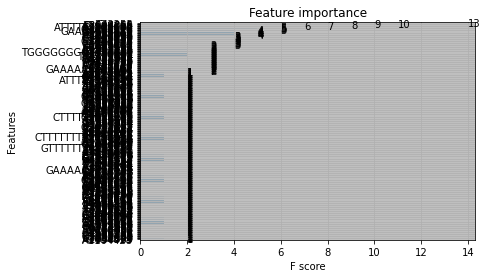

In [15]:
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

In [16]:
data2 = sorted(model.get_score().items(), key = lambda item:item[1], reverse = True)

In [17]:
np.save('snp_feat.npy', data2)

## top20 feature

In [119]:
import numpy as np
import pandas as pd
data1 = np.load('Pin_Lv6_8_10_kmrs_feat.npy')
data2 = np.load('snp_feat.npy')
# pd.DataFrame(columns = ['kmer', 'f-score'], data=data2).to_csv('snp_feat.csv', index=None)

In [120]:
data2[:20]

array([['AACGTGCACC', '5'],
       ['CACGAAGCAC', '3'],
       ['ATAGTTTGGC', '3'],
       ['ATTTAGGCTA', '3'],
       ['CGGAATTTTC', '2'],
       ['ATCCCTCGAG', '2'],
       ['AAGACCCATC', '2'],
       ['CAAGGTGTGG', '2'],
       ['CAACAAGTCG', '2'],
       ['ACAAGGTGCA', '2'],
       ['GAAAGAACTC', '2'],
       ['CAGGCTCCTA', '2'],
       ['ACTTAGCG', '2'],
       ['CTATTGGCCC', '2'],
       ['AGAGCGCTCA', '2'],
       ['CGACAGTCTC', '2'],
       ['AAAAAG', '1'],
       ['ACACAC', '1'],
       ['AAAACC', '1'],
       ['ACAAGTTCCA', '1']], dtype='<U10')

In [114]:
top20_snp_feat = data2[:20]

In [121]:
top20_kmer_feat = data1[:20]

In [123]:
np.save('top20_feat.npy', np.r_[top20_snp_feat, top20_kmer_feat])    ## 